In [1]:
# Decistion Tree Regressor - Stock Price Prediction
# simple example

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [3]:
raw_data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=962582400&period2=1593734400&interval=1d&events=history')
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-07-03,1454.599976,1469.579956,1450.849976,1469.540039,1469.540039,451900000
1,2000-07-05,1469.540039,1469.540039,1442.449951,1446.229980,1446.229980,1019300000
2,2000-07-06,1446.229980,1461.650024,1439.560059,1456.670044,1456.670044,947300000
3,2000-07-07,1456.670044,1484.119995,1456.670044,1478.900024,1478.900024,931700000
4,2000-07-10,1478.900024,1486.560059,1474.760010,1475.619995,1475.619995,838700000


In [4]:
raw_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5027,2020-06-26,3073.199951,3073.729980,3004.629883,3009.050049,3009.050049,8098120000
5028,2020-06-29,3018.590088,3053.889893,2999.739990,3053.239990,3053.239990,4462770000
5029,2020-06-30,3050.199951,3111.510010,3047.830078,3100.290039,3100.290039,4696280000
5030,2020-07-01,3105.919922,3128.439941,3101.169922,3115.860107,3115.860107,4443130000
5031,2020-07-02,3143.639893,3165.810059,3124.520020,3130.010010,3130.010010,4190830000


In [5]:
print(raw_data.shape)
print(type(raw_data))

(5032, 7)
<class 'pandas.core.frame.DataFrame'>


In [6]:
# how many values are in one year (e.g. 2009)
raw_data[raw_data['Date'].str.contains('2009-')].shape

(252, 7)

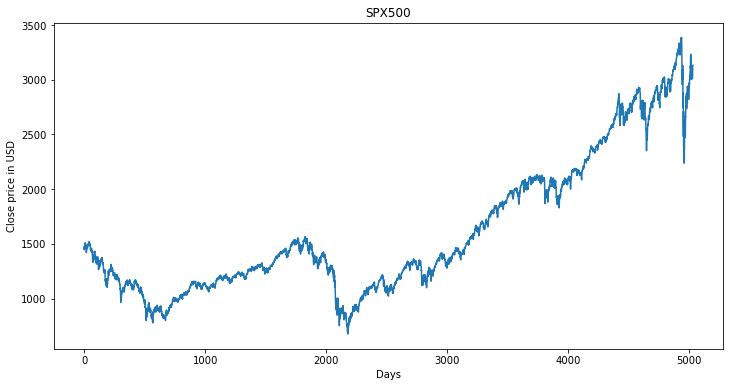

In [7]:
# Visualize data
plt.figure(figsize=(12,6))
plt.title('SPX500')
plt.xlabel('Days')
plt.ylabel('Close price in USD')
plt.plot(raw_data['Close'])
plt.show()

In [8]:
data_close = raw_data[['Close']]
print(type(data_close))
print(data_close.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Close'], dtype='object')


In [9]:
# Normalization
#dc_mean = data_close.mean()
#dc_std = data_close.std()
#data_close = (data_close - dc_mean) / dc_std

In [10]:
future_days = 25
data_close['Prediction'] = data_close['Close'].shift(-future_days)

<ipython-input-10-5fc6dadd2fda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_close['Prediction'] = data_close['Close'].shift(-future_days)


In [11]:
print(len(data_close))
print(type(data_close))
data_close.head(26), data_close.tail(26)

5032
<class 'pandas.core.frame.DataFrame'>


(          Close   Prediction
 0   1469.540039  1482.800049
 1   1446.229980  1472.869995
 2   1456.670044  1460.250000
 3   1478.900024  1471.839966
 4   1475.619995  1491.560059
 5   1480.880005  1484.430054
 6   1492.920044  1479.849976
 7   1495.839966  1496.069946
 8   1509.979980  1491.719971
 9   1510.489990  1499.479980
 10  1493.739990  1498.130005
 11  1481.959961  1505.969971
 12  1495.569946  1508.310059
 13  1480.189941  1506.449951
 14  1464.290039  1514.089966
 15  1474.469971  1509.839966
 16  1452.420044  1502.589966
 17  1449.619995  1517.680054
 18  1419.890015  1520.770020
 19  1430.829956  1507.079956
 20  1438.099976  1492.250000
 21  1438.699951  1502.510010
 22  1452.560059  1494.500000
 23  1462.930054  1489.260010
 24  1479.319946  1481.989990
 25  1482.800049  1484.910034,
             Close  Prediction
 5006  3029.729980  3130.01001
 5007  3044.310059         NaN
 5008  3055.729980         NaN
 5009  3080.820068         NaN
 5010  3122.870117         NaN
 50

In [12]:
#Create numpy array from data
X = np.array(data_close.drop(['Prediction'],1))[:-future_days]

In [13]:
y = np.array(data_close['Prediction'])[:-future_days]

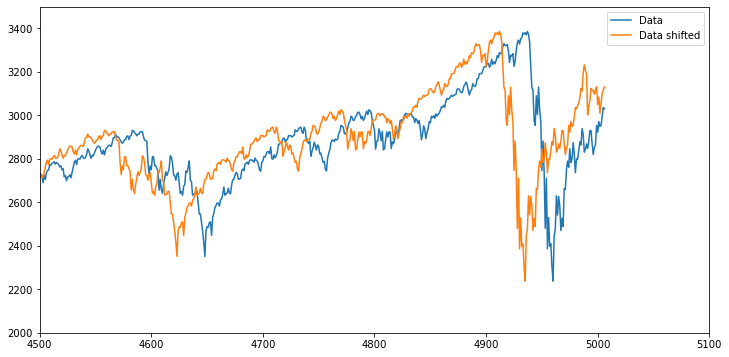

In [14]:
plt.figure(figsize=(12,6))
plt.plot(X)
plt.plot(y)
plt.legend(['Data', 'Data shifted'])
plt.axis([4500, 5100, 2000, 3500])
#plt.axis([4500, 5100, 0.5, 3])
plt.show()

In [15]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [16]:
X_train.shape

(3755, 1)

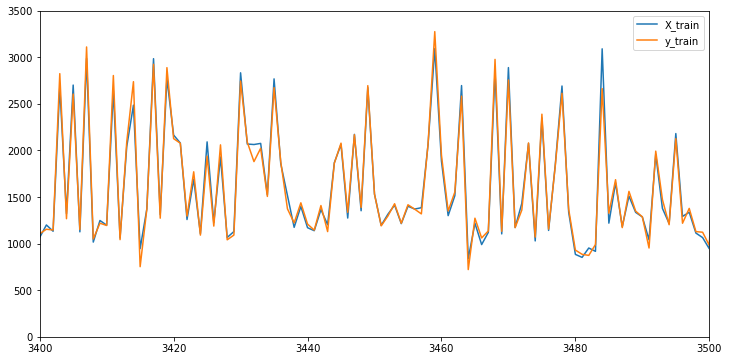

In [17]:
# Plot sample of X_train and y_train
plt.figure(figsize=(12,6))
plt.plot(X_train)
plt.plot(y_train)
plt.legend(['X_train', 'y_train'])
plt.axis([3400, 3500, 0, 3500])
plt.show()

In [18]:
X_test.shape

(1252, 1)

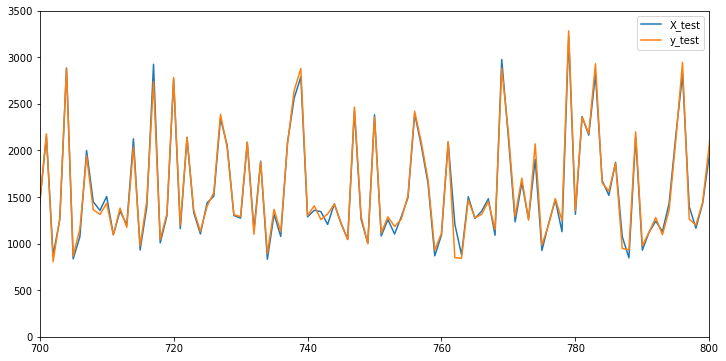

In [19]:
# Plot sample X_test and y_test
plt.figure(figsize=(12,6))
plt.plot(X_test)
plt.plot(y_test)
plt.legend(['X_test', 'y_test'])
plt.axis([700, 800, 0, 3500])
plt.show()

In [20]:
# Create model
# Decision Tree Regressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
tree.get_depth(), tree.get_n_leaves()

(32, 3697)

(25, 1) <class 'pandas.core.frame.DataFrame'>


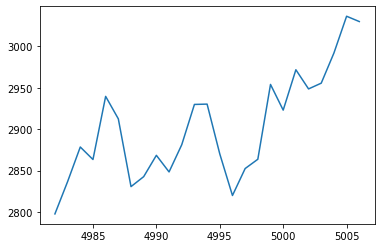

In [22]:
x_future = data_close.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
print(x_future.shape, type(x_future))

plt.plot(x_future)
plt.show()

In [23]:
x_future = np.array(x_future)

In [24]:
tree_prediction = tree.predict(x_future)
tree_prediction

array([2840.689941, 3055.72998 , 2850.959961, 3122.870117, 3112.350098,
       2953.560059, 3232.389893, 3207.179932, 3190.139893, 2992.070068,
       3041.310059, 2658.689941, 3124.73999 , 3113.48999 , 3115.340088,
       2904.97998 , 3117.860107, 3131.290039, 2961.790039, 2761.629883,
       3009.050049, 3053.23999 , 3100.290039, 3115.860107, 3130.01001 ])

<ipython-input-25-c408d791ca32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


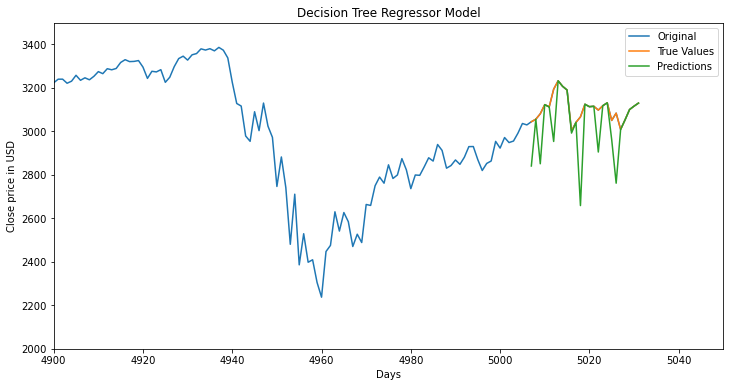

In [25]:
### Visualize
predictions = tree_prediction
valid = data_close[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('Decision Tree Regressor Model')
plt.xlabel('Days')
plt.ylabel('Close price in USD')
plt.plot(data_close['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'True Values', 'Predictions'])
plt.axis([4900, 5050, 2000, 3500])
#plt.axis([4900, 5050, -1, 3])
plt.show()

In [26]:
data_close.shape

(5032, 2)